In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | georgetown
Processing Record 2 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 13 | high level
Processing Record 4 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 13 | tigil
Processing Record 6 of Set 13 | hamilton
Processing Record 7 of Set 13 | samarai
Processing Record 8 of Set 13 | ushuaia
Processing Record 9 of Set 13 | ayan
Processing Record 10 of Set 13 | atuona
Processing Record 11 of Set 13 | kavaratti
Processing Record 12 of Set 13 | castro
Processing Record 13 of Set 13 | upernavik
Processing Record 14 of Set 13 | rikitea
Processing Record 15 of Set 13 | codrington
Processing Record 16 of Set 13 | santa paula
Processing Record 17 of Set 13 | escanaba
Processing Record 18 of Set 13 | carnarvon
Processing Record 19 of Set 13 | karratha
Processing Record 20 of Set 13 | vaini
Processing Record 21 of Set 13 | kaitangata
Pro

Processing Record 34 of Set 16 | meulaboh
Processing Record 35 of Set 16 | mahajanga
Processing Record 36 of Set 16 | zephyrhills
Processing Record 37 of Set 16 | agadir
Processing Record 38 of Set 16 | tikhmenevo
City not found. Skipping...
Processing Record 39 of Set 16 | cheuskiny
City not found. Skipping...
Processing Record 40 of Set 16 | nhulunbuy
Processing Record 41 of Set 16 | geraldton
Processing Record 42 of Set 16 | liepaja
Processing Record 43 of Set 16 | yellowknife
Processing Record 44 of Set 16 | pitimbu
Processing Record 45 of Set 16 | yulara
Processing Record 46 of Set 16 | jibuti
Processing Record 47 of Set 16 | macklin
Processing Record 48 of Set 16 | dikson
Processing Record 49 of Set 16 | buenos aires
Processing Record 50 of Set 16 | north bend
Processing Record 1 of Set 17 | nouadhibou
Processing Record 2 of Set 17 | nitra
Processing Record 3 of Set 17 | voyvozh
Processing Record 4 of Set 17 | dali
Processing Record 5 of Set 17 | itaueira
Processing Record 6 of S

Processing Record 18 of Set 20 | samalaeulu
City not found. Skipping...
Processing Record 19 of Set 20 | lenger
Processing Record 20 of Set 20 | bandarbeyla
Processing Record 21 of Set 20 | chalmette
Processing Record 22 of Set 20 | altay
Processing Record 23 of Set 20 | puerto escondido
Processing Record 24 of Set 20 | brunsbuttel
Processing Record 25 of Set 20 | bambanglipuro
Processing Record 26 of Set 20 | bukachacha
Processing Record 27 of Set 20 | ixtapa
Processing Record 28 of Set 20 | aromashevo
Processing Record 29 of Set 20 | acapulco
Processing Record 30 of Set 20 | la palma
Processing Record 31 of Set 20 | lieksa
Processing Record 32 of Set 20 | adjumani
Processing Record 33 of Set 20 | saint-pierre
Processing Record 34 of Set 20 | shimoda
Processing Record 35 of Set 20 | mahibadhoo
Processing Record 36 of Set 20 | darnah
Processing Record 37 of Set 20 | prince albert
Processing Record 38 of Set 20 | grants pass
Processing Record 39 of Set 20 | nelson bay
Processing Record 

Processing Record 2 of Set 24 | muzhi
Processing Record 3 of Set 24 | macamic
Processing Record 4 of Set 24 | sao felix do xingu
Processing Record 5 of Set 24 | manokwari
Processing Record 6 of Set 24 | trairi
Processing Record 7 of Set 24 | san jeronimo
Processing Record 8 of Set 24 | batouri
Processing Record 9 of Set 24 | yilan
Processing Record 10 of Set 24 | tenenkou
Processing Record 11 of Set 24 | chik
Processing Record 12 of Set 24 | pevek
Processing Record 13 of Set 24 | zaraza
Processing Record 14 of Set 24 | ippy
Processing Record 15 of Set 24 | panaba
Processing Record 16 of Set 24 | yamada
Processing Record 17 of Set 24 | half moon bay
Processing Record 18 of Set 24 | havre-saint-pierre
Processing Record 19 of Set 24 | penzance
Processing Record 20 of Set 24 | henties bay
Processing Record 21 of Set 24 | belmonte
Processing Record 22 of Set 24 | nizwa
Processing Record 23 of Set 24 | ahuimanu
Processing Record 24 of Set 24 | drensteinfurt
Processing Record 25 of Set 24 | n

In [10]:
len(city_data)

570

In [11]:
# Convert the array of dictionaires to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,87.89,64,20,1.99,MY,2021-12-10 03:35:32
1,High Level,58.5169,-117.1360,-3.89,84,1,0.00,CA,2021-12-10 03:35:33
2,Tigil,57.8000,158.6667,19.67,95,100,5.55,RU,2021-12-10 03:35:33
3,Hamilton,39.1834,-84.5333,56.25,64,90,1.99,US,2021-12-10 03:33:11
4,Samarai,-10.6167,150.6667,84.83,73,100,20.36,PG,2021-12-10 03:35:34
5,Ushuaia,-54.8000,-68.3000,49.66,71,20,3.44,AR,2021-12-10 03:31:31
6,Ayan,56.4500,138.1667,16.97,63,58,10.13,RU,2021-12-10 03:35:35
7,Atuona,-9.8000,-139.0333,78.55,68,77,13.51,PF,2021-12-10 03:35:35
8,Kavaratti,10.5669,72.6420,82.78,72,50,9.84,IN,2021-12-10 03:35:36
9,Castro,-24.7911,-50.0119,51.93,97,2,4.76,BR,2021-12-10 03:35:36


In [12]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2021-12-10 03:35:32,5.4112,100.3354,87.89,64,20,1.99
1,High Level,CA,2021-12-10 03:35:33,58.5169,-117.1360,-3.89,84,1,0.00
2,Tigil,RU,2021-12-10 03:35:33,57.8000,158.6667,19.67,95,100,5.55
3,Hamilton,US,2021-12-10 03:33:11,39.1834,-84.5333,56.25,64,90,1.99
4,Samarai,PG,2021-12-10 03:35:34,-10.6167,150.6667,84.83,73,100,20.36
5,Ushuaia,AR,2021-12-10 03:31:31,-54.8000,-68.3000,49.66,71,20,3.44
6,Ayan,RU,2021-12-10 03:35:35,56.4500,138.1667,16.97,63,58,10.13
7,Atuona,PF,2021-12-10 03:35:35,-9.8000,-139.0333,78.55,68,77,13.51
8,Kavaratti,IN,2021-12-10 03:35:36,10.5669,72.6420,82.78,72,50,9.84
9,Castro,BR,2021-12-10 03:35:36,-24.7911,-50.0119,51.93,97,2,4.76


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

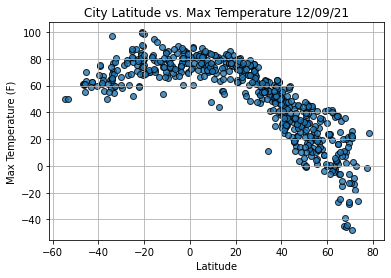

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

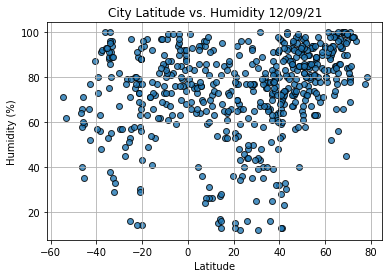

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

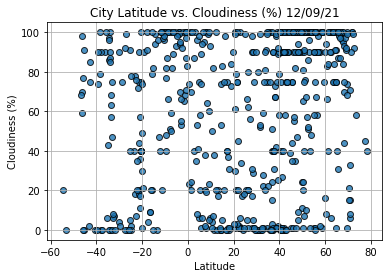

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

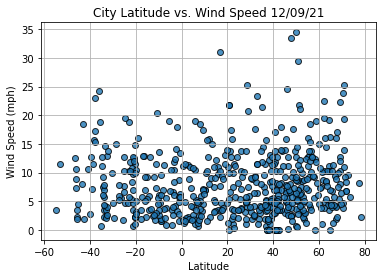

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                  Santa Paula
Country                        US
Date          2021-12-10 03:31:04
Lat                       34.3542
Lng                     -119.0593
Max Temp                    55.67
Humidity                       78
Cloudiness                      1
Wind Speed                    3.0
Name: 13, dtype: object

In [21]:
city_data_df["Lat"]>=0

0       True
1       True
2       True
3       True
4      False
       ...  
565     True
566     True
567     True
568    False
569     True
Name: Lat, Length: 570, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2021-12-10 03:35:32,5.4112,100.3354,87.89,64,20,1.99
1,High Level,CA,2021-12-10 03:35:33,58.5169,-117.1360,-3.89,84,1,0.00
2,Tigil,RU,2021-12-10 03:35:33,57.8000,158.6667,19.67,95,100,5.55
3,Hamilton,US,2021-12-10 03:33:11,39.1834,-84.5333,56.25,64,90,1.99
6,Ayan,RU,2021-12-10 03:35:35,56.4500,138.1667,16.97,63,58,10.13
...,...,...,...,...,...,...,...,...,...
563,Shahrud,IR,2021-12-10 03:40:19,36.4182,54.9763,41.38,51,0,4.29
565,Kushima,JP,2021-12-10 03:40:21,31.4583,131.2333,62.11,69,99,2.68
566,Havoysund,NO,2021-12-10 03:40:22,70.9963,24.6622,22.08,69,33,10.98
567,Altagracia De Orituco,VE,2021-12-10 03:40:22,9.8601,-66.3814,70.74,91,93,6.29


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2021-12-10 03:35:32,5.4112,100.3354,87.89,64,20,1.99
1,High Level,CA,2021-12-10 03:35:33,58.5169,-117.1360,-3.89,84,1,0.00
2,Tigil,RU,2021-12-10 03:35:33,57.8000,158.6667,19.67,95,100,5.55
3,Hamilton,US,2021-12-10 03:33:11,39.1834,-84.5333,56.25,64,90,1.99
6,Ayan,RU,2021-12-10 03:35:35,56.4500,138.1667,16.97,63,58,10.13


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

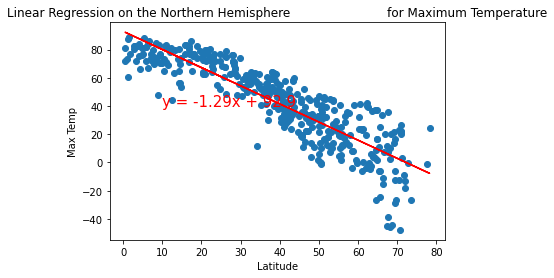

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

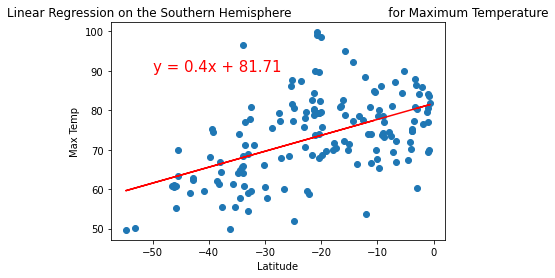

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

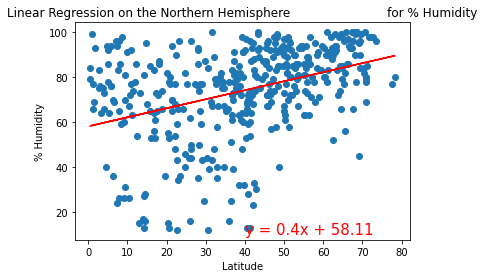

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

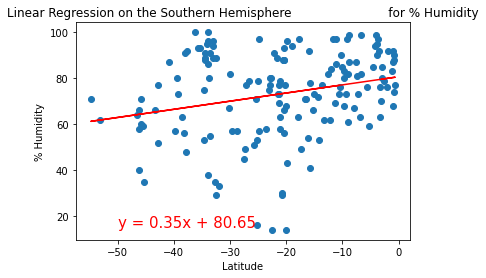

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

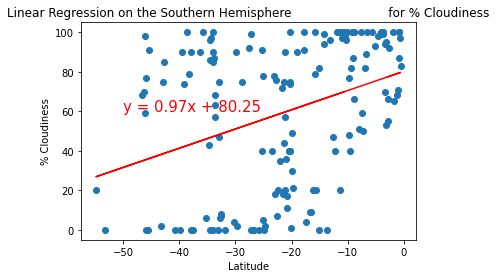

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

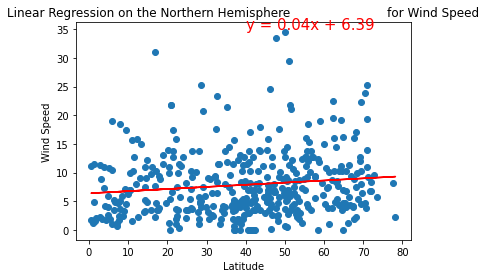

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

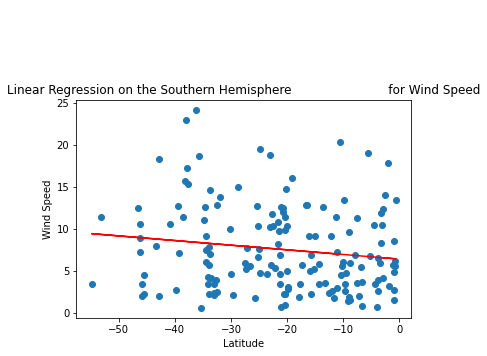

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))